In [84]:
import pandas as pd
import seaborn as sns

In [2]:
gp = pd.read_csv("Google-Playstore-32K.csv")

In [3]:
del gp["App Name"]
del gp["Latest Version"]
del gp["Minimum Version"]
del gp["Last Updated"]

In [4]:
gp

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
0,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone
1,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone
2,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone
3,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone
4,FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone
5,FOOD_AND_DRINK,3.82532239,2559.0,"100,000+",23M,0,Everyone
6,TRAVEL_AND_LOCAL,4.267267704,421918.0,"10,000,000+",Varies with device,0,Teen
7,FOOD_AND_DRINK,4.495084763,142618.0,"5,000,000+",Varies with device,0,Everyone
8,TRAVEL_AND_LOCAL,3.811764717,85.0,"10,000+",4.1M,0,Everyone
9,FOOD_AND_DRINK,4.545353413,67514.0,"5,000,000+",Varies with device,0,Everyone


# Missing Values

In [5]:
gp.isnull().mean().sort_values(ascending=False)

Reviews           0.000031
Content Rating    0.000000
Price             0.000000
Size              0.000000
Installs          0.000000
Rating            0.000000
Category          0.000000
dtype: float64

In [6]:
m_rev=gp["Reviews"].mean()

In [7]:
gp["Reviews"] =gp["Reviews"].fillna(m_rev)

In [8]:
gp.dtypes

Category           object
Rating             object
Reviews           float64
Installs           object
Size               object
Price              object
Content Rating     object
dtype: object

# Hence all the most dtypes are in string, need to change into int 

In [9]:
gp.Reviews=gp.Reviews.astype('int64')

# Install coloumn

In [10]:
new_Install=[]
for row in gp.Installs:
    row = row[:-1]
    newrow = row.replace(",","")
    try:
        new_Install.append(int(newrow))
    except:
        a=100000
        new_Install.append(a)
gp.Installs=new_Install
gp.Installs.head()
        

0      5000000
1    100000000
2       100000
3     10000000
4        10000
Name: Installs, dtype: int64

# Price Column

In [11]:
new_Price=[]
for np in gp.Price:
    if np=='0':
        newrow=0
    else:
        newrow=1
    new_Price.append(newrow)
gp.Price = new_Price
gp.Price.head()
    
            
    

0    0
1    0
2    0
3    0
4    1
Name: Price, dtype: int64

# Size

In [12]:
new_Size =[]
for size in gp.Size:
    size = size[:-1]
    try:
        new_Size.append(float(size))
    except:
        new_Size.append(0)
gp.Size=new_Size
gp.Size.head()
    

0     0.0
1     0.0
2     1.4
3    16.0
4     0.0
Name: Size, dtype: float64

# Rating

In [13]:
new_Rate=[]
for row in gp.Rating:
    try:
        
        newrow =float(row[:])
    except:  
        newrow=4
    new_Rate.append(newrow)
        
gp.Rating = new_Rate

gp.Rating.head()

0    4.548562
1    4.400671
2    3.656329
3    4.107233
4    4.647752
Name: Rating, dtype: float64

In [14]:
gp["Rating"]=gp["Rating"].astype("int")

In [15]:
gp.describe(include="all")

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
count,32000,32000.000000,3.200000e+04,3.200000e+04,32000.000000,32000.000000,32000
unique,52,NaN,NaN,NaN,NaN,NaN,9
top,EDUCATION,NaN,NaN,NaN,NaN,NaN,Everyone
freq,3431,NaN,NaN,NaN,NaN,NaN,27455
mean,NaN,3.808219,9.849088e+04,4.126199e+06,26.301331,0.064062,NaN
std,NaN,0.532691,1.173693e+06,5.871726e+07,64.285947,0.244868,NaN
min,NaN,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,4.000000,1.390000e+02,1.000000e+04,4.400000,0.000000,NaN
50%,NaN,4.000000,1.463000e+03,1.000000e+05,12.000000,0.000000,NaN
75%,NaN,4.000000,1.444950e+04,1.000000e+06,30.000000,0.000000,NaN


#Content Rating 

In [16]:
gp["Content Rating"].value_counts()

Everyone           27455
Teen                2860
Everyone 10+        1054
Mature 17+           622
Adults only 18+        3
Unrated                3
100,000+               1
0                      1
$0.99                  1
Name: Content Rating, dtype: int64

In [17]:
con_ra=[]
for row in gp["Content Rating"]:
    if row=="Everyone":
        new_cr= 2
    elif row=="Mature 17+" or row=="Adults only 18+":
        new_cr=1
    elif row=="Teen":
        new_cr=0
    else:
        new_cr=2
    con_ra.append(new_cr)

gp["Content Rating"]= con_ra

gp["Content Rating"].head()    

0    2
1    2
2    2
3    2
4    2
Name: Content Rating, dtype: int64

In [18]:
gp.describe(include="all")

,Category,Rating,Reviews,Installs,Size,Price,Content Rating
count,32000,32000.000000,3.200000e+04,3.200000e+04,32000.000000,32000.000000,32000.000000
unique,52,NaN,NaN,NaN,NaN,NaN,NaN
top,EDUCATION,NaN,NaN,NaN,NaN,NaN,NaN
freq,3431,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.808219,9.849088e+04,4.126199e+06,26.301331,0.064062,1.801719
std,NaN,0.532691,1.173693e+06,5.871726e+07,64.285947,0.244868,0.581142
min,NaN,1.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,4.000000,1.390000e+02,1.000000e+04,4.400000,0.000000,2.000000
50%,NaN,4.000000,1.463000e+03,1.000000e+05,12.000000,0.000000,2.000000
75%,NaN,4.000000,1.444950e+04,1.000000e+06,30.000000,0.000000,2.000000


# Analysing Data
# Dataset contains arount 32,000 apps across 52 different categories in the Google App Store like Education, Food & Drink, Books & Reference, Travel & Local, Health & Fitness,Social, Finance, Medical, and Entertainment etc..
## By using some visualizing tools like seaborn,matplotlib etc..

In [19]:
gp.Category.value_counts().plot(kind='barh',figsize=(12,22))

# Observation

### From the above chart we can understand that the Education app is highest among all around 3400 apps from education
### The least are podcast,channel new 2 ect..
### so it could be noticed that some of the apps are in average number(1000-1500) in our dataset. 

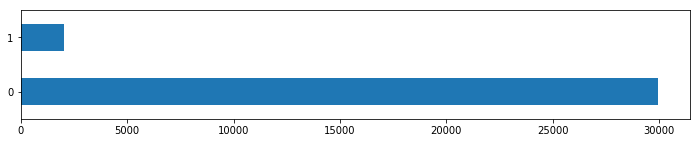

In [20]:
gp["Price"].value_counts().plot(kind='barh',figsize= (12,2))

### Most of the 90% apps are free to install.The highest insatallation are done in free apps.Play Store has vast apps with cost, but most of these apps had been downloaded only by few.  

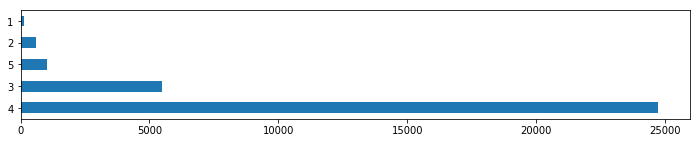

In [21]:
gp["Rating"].value_counts().plot(kind='barh',figsize= (12,2))

# most of people who gave ratings for the apps are likely to be 4. 

In [104]:

import matplotlib.pyplot as plt

In [23]:
cr=gp.loc[:,["Category","Rating"]]

In [24]:
edr=[]
tr=[]
er=[]
for i in range(0,32000,1):
    ct=cr.iloc[i,0]
    rt=cr.iloc[i,1]
    if ct=="FOOD_AND_DRINK" and rt==1:
        ro1=1
        edr.append(ro1)
    elif ct=="FOOD_AND_DRINK" and rt==2:
        ro1=2
        edr.append(ro1)
    elif ct=="FOOD_AND_DRINK" and rt==3:
        ro1=3
        edr.append(ro1)
    elif ct=="FOOD_AND_DRINK" and rt==4:
        ro1=4
        edr.append(ro1)
    elif ct=="TOOLS" and rt==1:
        ro2=1
        tr.append(ro2)
    elif ct=="TOOLS" and rt==2:
        ro2=2
        tr.append(ro2)
    elif ct=="TOOLS" and rt==3:
        ro2=3
        tr.append(ro2)
    elif ct=="TOOLS" and rt==4:
        ro2=4
        tr.append(ro2)
    elif ct=="ENTERTAINMENT" and rt==1:
        ro3=1
        er.append(ro3)
    elif ct=="ENTERTAINMENT" and rt==2:
        ro3=2
        er.append(ro3)
    elif ct=="ENTERTAINMENT" and rt==3:
        ro3=3
        er.append(ro3)
    elif ct=="ENTERTAINMENT" and rt==4:
        ro3=4
        er.append(ro3)
    else:
        pass

(array([   9.,    0.,    0.,   62.,    0.,    0.,  427.,    0.,    0.,
        1532.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

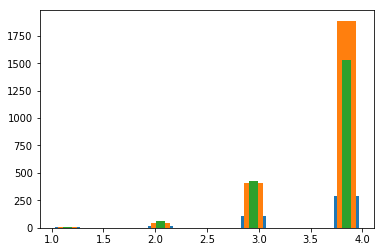

In [25]:
plt.hist(edr,histtype="bar",rwidth=0.8)
plt.hist(tr,histtype="bar",rwidth=0.6)
plt.hist(er,histtype="bar",rwidth=0.3)

In [45]:
pie_cat= gp.groupby('Category').agg('count')
pie_rate = gp.groupby('Rating').agg('count')


In [46]:
def group_lower_ranking_values(column):
    pie_counts = gp.groupby(column).agg('count')
    pct_value = pie_counts[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = pie_counts[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    pie_grouped = gp.apply(fix_values, axis=1).groupby(column).agg('count')
    return pie_grouped

pie_cat = group_lower_ranking_values('Category')
pie_rate = group_lower_ranking_values('Rating')


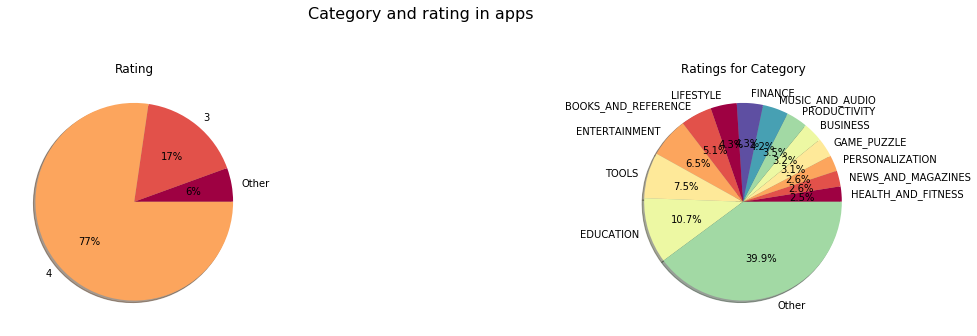

In [47]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

cat_labels = pie_cat.Rating.sort_values().index
cat_counts = pie_cat.Rating.sort_values()

rate_labels = pie_rate.Category.sort_values().index
rate_counts = pie_rate.Category.sort_values()

plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Ratings for Category')

source_pie = plt.pie(cat_counts, labels=cat_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.subplot(the_grid[0, 0], aspect=1, title='Rating')

flavor_pie = plt.pie(rate_counts,labels=rate_labels, autopct='%.0f%%', shadow=True, colors=colors)

plt.suptitle('Category and rating in apps', fontsize=16)


plt.show()


# Education, Tools and Entertainment were the most common categories,has rating for about 10%, 8% and 7% in our dataset.Almost 77% of the people had given 4 star rating

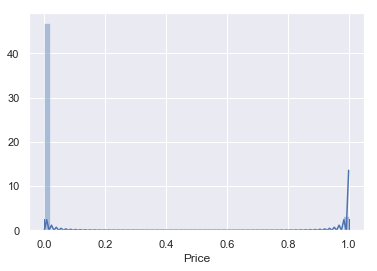

In [103]:
sns.distplot(gp.Price, rug=True, hist=True, kde=True)

# In our dataset, the majority of apps in Education,Tools ,Entertainment categories had the biggest number of unpaid apps available for download. 

In [66]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()


In [68]:
gp_arr=gp["Installs"].values

In [69]:
gp_arr=gp_arr.reshape(-1, 1)

In [70]:
gp_arr=sc.fit_transform(gp_arr)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
gp["Installs"]=gp_arr

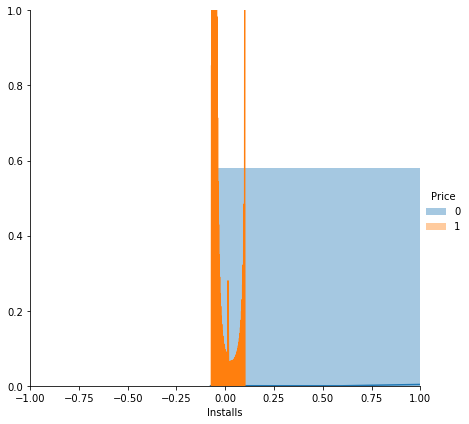

In [72]:
sns.FacetGrid(gp,hue="Price",height=6,xlim=(-1,1),ylim=(-1,1)).map(sns.distplot,"Installs").add_legend()

## # here 0 represents free apps and 1 represents cost apps.There were more installation in free apps

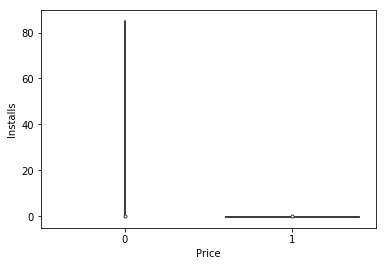

In [75]:
sns.violinplot(x="Price",y="Installs",data=gp,size=7)

# vertical line implies free apps
# horizontal line implies cost apps


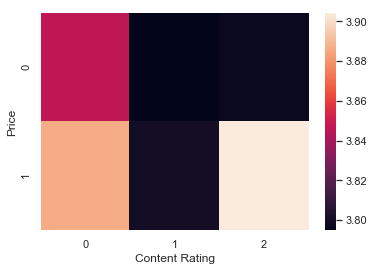

In [102]:
gp1=gp.pivot_table("Rating","Price","Content Rating",)
sns.heatmap(gp1)

# here we can observe three things
# 1)Price 1 = cost and 0 = free apps
# 2)Rating 
# 3)Content Rating 
####         Everyone = 2
####         Mature 17+ or Adults only = 1
####         Teen = 0
# For free apps there were around 3.88 to 3.90 ratings from teens
# For cost apps there were around 3.80 to 3.82 ratings from Mature17+ or adults only
# Everyone had given 4 or above ratings to cost apps

# Conclusion
# From the google play Store Dataset the datas are preprocessed and make it into somehow sensible data